<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileCKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
DrugDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DrugDF.xlsx')
DrugDF.shape

(52619, 28)

> **Remove Pricipal keep StartDTTM and EndDTTM instead**

In [3]:
import pandas as pd
VisitDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VisitDF.xlsx')
VisitDF.shape

(52618, 13)

In [4]:
import pandas as pd
DiagDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DiagDF.xlsx')
DiagDF.shape

(52619, 15)

In [5]:
import pandas as pd
LabDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/LabDF.xlsx')
LabDF.shape

(52619, 36)

In [6]:
import pandas as pd
VitalDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VitalDF.xlsx')
VitalDF.shape

(52619, 9)

In [7]:
VisitDF = VisitDF.iloc[:, 1:]
VitalDF = VitalDF.iloc[:, 1:]
LabDF = LabDF.iloc[:, 1:]
DiagDF = DiagDF.iloc[:, 1:]
DrugDF = DrugDF.iloc[:, 1:]

## **TestMerge**

In [8]:
import pandas as pd

# Assuming you have four dataframes: DrugDF1, DiagDF, DrugDF2, LabDF

# Merge DrugDF1, DiagDF, DrugDF2, and LabDF based on the common columns
merged_df = DrugDF.merge(VisitDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(VitalDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(DiagDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(LabDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer')

# The merged_df will contain all the data from the four dataframes, merged on the common columns.
merged_df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.20,9.41
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.02,NaN
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.54,5.42
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.47,NaN
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,105,105,0,0,0,0,0,...,NaN,NaN,8.37,157.7,NaN,NaN,NaN,NaN,33.68,NaN
52615,3319971,10553916,-4.256753,0,105,0,0,0,105,0,...,NaN,NaN,13.37,71.1,NaN,NaN,NaN,NaN,26.47,NaN
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.36,NaN
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.69,18.70


In [9]:
merged_df.shape

(52619, 84)

## **Add Variable**

> **LabLocation (mode) column and fill null in VisitLocation**

In [10]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

mode_location = lab.groupby('PatientUID')['Location'].apply(lambda x: x.mode()[0]).reset_index()
mode_dict = dict(zip(mode_location['PatientUID'], mode_location['Location']))
merged_df['Location'] = merged_df.apply(lambda row: mode_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)

In [11]:
merged_df['LabLocation'] = lab['PatientUID'].map(mode_location.set_index('PatientUID')['Location'])

In [12]:
merged_df.shape

(52619, 85)

> **Recent_Creatinine Recent_eGFR Recent_Date**

In [13]:
import pandas as pd
df0 = pd.DataFrame(lab)
df = pd.DataFrame(df0)
df = df[['PatientUID', 'ResultItemName', 'ResultValue', 'CWhen']]
df['ResultItemName'] = df['ResultItemName'].replace(['CREATININE, 32202'], 'Creatinine')
df = df[df['ResultItemName'].isin(['eGFR(CKD-EPI) age >=18', 'Creatinine'])]
pivot = df.pivot(index=['PatientUID', 'CWhen'], columns='ResultItemName', values='ResultValue').reset_index()
sort = pivot.sort_values('CWhen').groupby('PatientUID').tail(1)
sort[['Creatinine', 'eGFR(CKD-EPI) age >=18']] = sort.groupby('PatientUID')[['Creatinine', 'eGFR(CKD-EPI) age >=18']].apply(lambda x: x.ffill().bfill())
result = sort.rename(columns={'Creatinine': 'Recent_Creatinine', 'eGFR(CKD-EPI) age >=18': 'Recent_eGFR', 'CWhen':'Recent_Date'})

<ipython-input-13-97383c362ca0>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sort[['Creatinine', 'eGFR(CKD-EPI) age >=18']] = sort.groupby('PatientUID')[['Creatinine', 'eGFR(CKD-EPI) age >=18']].apply(lambda x: x.ffill().bfill())


>> **fill Recent_eGFR and Recent_Cretinine null** >> with latest value before

In [14]:
# Fill the NaN values
import numpy as np

# Fill specific NaN values
result['Recent_eGFR'] = result['Recent_eGFR'].mask(result['PatientUID'] == 21282, result['Recent_eGFR'].fillna(55.50))
result['Recent_eGFR'] = result['Recent_eGFR'].mask(result['PatientUID'] == 173101, result['Recent_eGFR'].fillna(72.85))

result['Recent_Creatinine'] = result['Recent_Creatinine'].mask(result['PatientUID'] == 792446, result['Recent_Creatinine'].fillna(1.74))

# Verify if there are still any null values
print(result.isnull().any())

ResultItemName
PatientUID           False
Recent_Date          False
Recent_Creatinine    False
Recent_eGFR          False
dtype: bool


In [15]:
# Merging the 'latest' DataFrame with 'merged_df' based on 'PatientUID'
merged_df = pd.merge(result[['PatientUID', 'Recent_Creatinine', 'Recent_eGFR','Recent_Date']], merged_df, on='PatientUID', how='inner')

> **VisitLocation**

In [16]:
merged_df = merged_df.rename(columns={'Location': 'VisitLocation'})

>> **Fill null of StartDTTM and EndDttm** by mode of each ID

In [17]:
merged_df[merged_df[['StartDTTM', 'EndDttm']].isnull().any(axis=1)][['PatientUID','StartDTTM', 'EndDttm']].shape

(43, 3)

In [18]:
import pandas as pd
visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')
mode_start = visit.groupby('PatientUID')['StartDTTM'].apply(lambda x: x.mode()[0]).reset_index()
mode_dt = dict(zip(mode_start['PatientUID'], mode_start['StartDTTM']))
merged_df['StartDTTM'] = merged_df.apply(lambda row: mode_dt[row['PatientUID']] if pd.isnull(row['StartDTTM']) else row['StartDTTM'], axis=1)

mode_end = visit.groupby('PatientUID')['EndDttm'].apply(lambda x: x.mode()[0]).reset_index()
mode_tm = dict(zip(mode_end['PatientUID'], mode_end['EndDttm']))
merged_df['EndDttm'] = merged_df.apply(lambda row: mode_tm[row['PatientUID']] if pd.isnull(row['EndDttm']) else row['EndDttm'], axis=1)

<ipython-input-18-d0d6603bb3a0>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')


In [19]:
merged_df[merged_df[['StartDTTM', 'EndDttm']].isnull().any(axis=1)][['PatientUID','StartDTTM', 'EndDttm']].shape

(0, 3)

In [20]:
merged_df['PatientUID'].nunique() #number of patient

18168

In [26]:
merged_df.shape

(52619, 88)

> **Hand fill missing value**

In [22]:
merged_df['Age'] = merged_df['Age'].fillna('69')
merged_df['Sex'] = merged_df['Sex'].fillna('หญิง')
merged_df['NATNL'] = merged_df['NATNL'].fillna('ไทย')
merged_df['InPatient'] = merged_df['InPatient'].fillna(0)
merged_df['OutPatient'] = merged_df['OutPatient'].fillna(1)
merged_df['Emergency'] = merged_df['Emergency'].fillna(0)

## **CheckMissing**

In [23]:
null_df = merged_df.isnull()

# Use the sum() method on the boolean DataFrame to count the number of null values in each column
null_count = null_df.sum()

# Filter columns with null values (exclude columns with no null values)
null_columns = null_count[null_count > 0]

# Filter columns with non-null values
non_null_columns = null_count[null_count == 0]

# Display columns with non-null values
print("Columns with Non-Null Values:")
for column_name in non_null_columns.index:
    print(column_name)

# Display the columns with null values and their counts
print("\nColumns with Null Values and Their Counts:")
print(null_columns)

Columns with Non-Null Values:
PatientUID
Recent_Creatinine
Recent_eGFR
Recent_Date
PatientVisitUID
Slopes
G1M2:ARB
G3M1:Statin
G5M2:NSAIDs
G1M5:Diuretic
G1M7:Beta blocker
G1M3:Dihydropyridine CCB
G1M6:MRA
G1M1:ACEI
G2M2:Metformin
G2M3:DPP4 inhibitor
G2M1:SU
G3M3:Fibrate
G2M5:SGLT2i
G4M1:Allopurinol
G1M9:Vasodilator
G1M8:Alpha blocker
G2M6:Insulin
G2M4:TZD
G4M2:Febuxostat
G3M2:Ezetimibe
G1M4:Non-dihydropyridine CCB
G5M1:Ketoanalog amino acid
G2M7:GLP1-RA
G4M3:Uricosuric agent
Sex
Age
NATNL
VisitLocation
StartDTTM
EndDttm
InPatient
OutPatient
Emergency
D1:Hypertension
D2:Diabetes millitus
D3:Dyslipidemia
D4:SLE
D5:Systemic sclerosis
D6:Rheumatoid arthritis
D7:HIV infection
D8:HBV infection
D9:HCV infection
D10:Ischemic heart disease
D11:Heart failure
L1:eGFR
LabLocation

Columns with Null Values and Their Counts:
CWhen                        14047
Systolic BP                   4884
Diastolic BP                  4913
BMI                          14807
BSA                          14808
L2

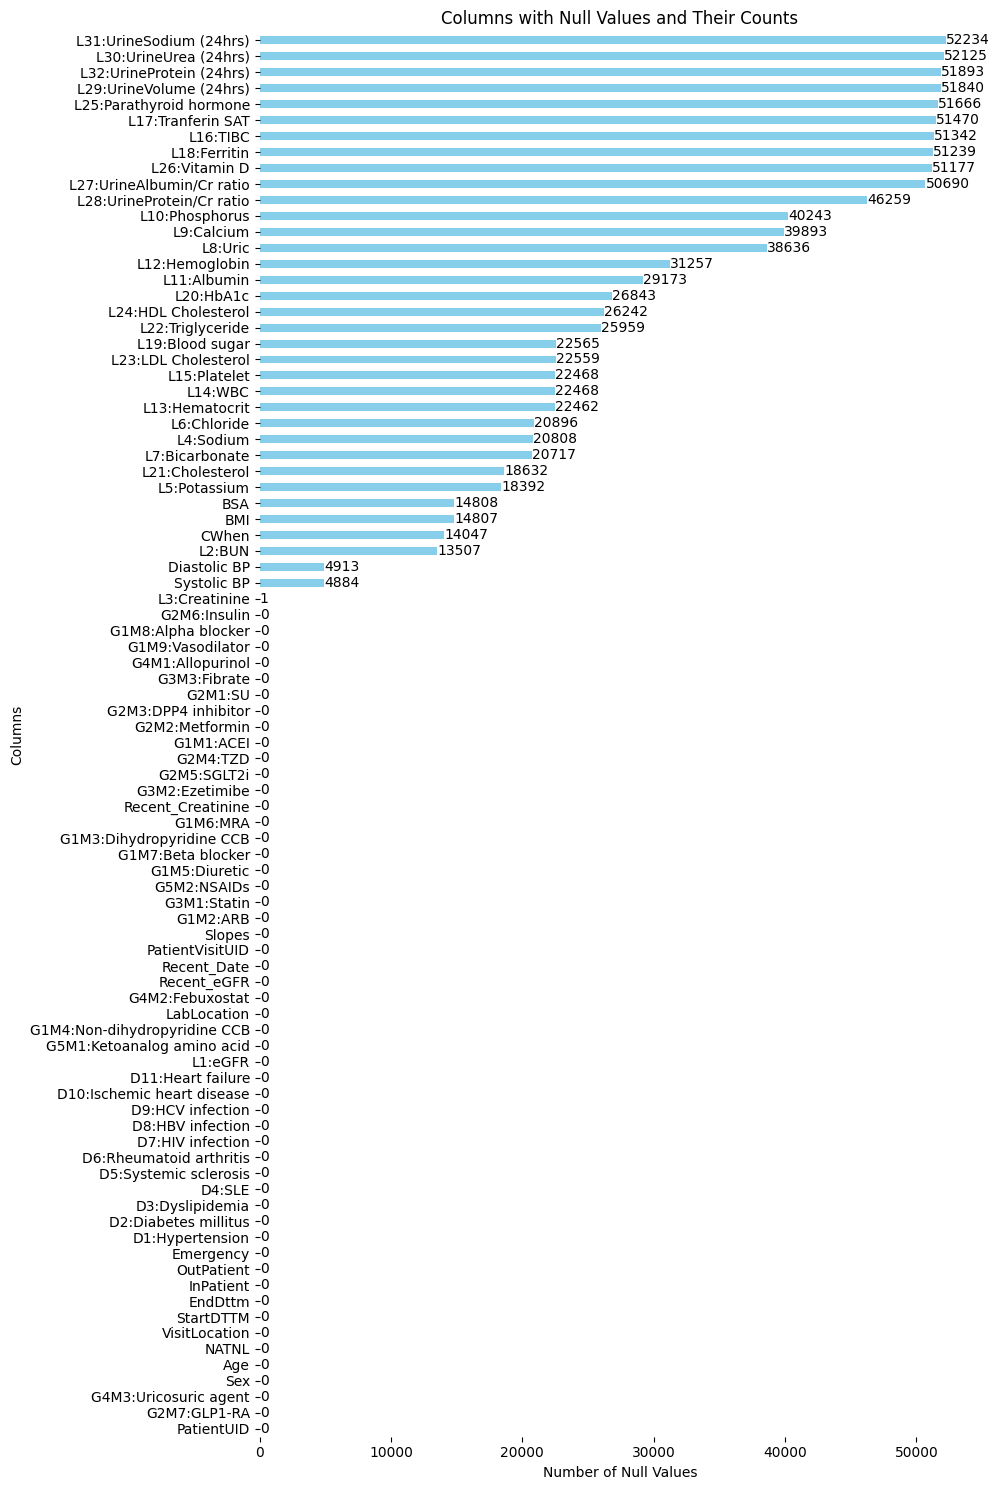

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame named merged_df

# Use the isnull() method to create a DataFrame of boolean values indicating null values
null_df = merged_df.isnull()

# Use the sum() method on the boolean DataFrame to count the number of null values in each column
null_count = null_df.sum()

# Filter columns with null values (exclude columns with no null values)
#null_count = null_count[null_count > 0]

# Sort the columns by the number of null values in ascending order
null_count_sorted = null_count.sort_values()

# Create a horizontal bar plot to visualize the distribution
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars

# Remove the frame or borders around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()

# Add labels with the number of null values next to each bar horizontally
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()


In [25]:
#merged_df.to_excel('WideTable.xlsx')